# Multi-class Classification example using OVA technique

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

%matplotlib inline

In [218]:
wine = pd.read_csv("D:/UTP/datasets/winequality-red.csv", sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


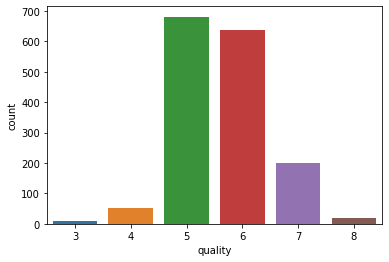

In [219]:
wine.isnull().sum()
sns.countplot(wine['quality'])

# Relabel the target classes

In [220]:
bins = (2,3,4,5,6,7,8)
group_names = ['0','1','2','3','4','5']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels=group_names)
wine['quality'].unique()

[2, 3, 4, 1, 5, 0]
Categories (6, object): [0 < 1 < 2 < 3 < 4 < 5]

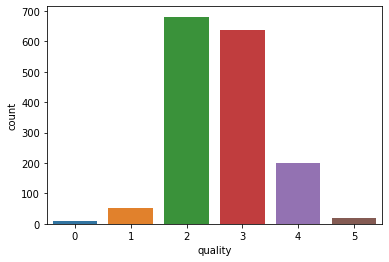

In [221]:
sns.countplot(wine['quality'])

# Divide dataset into training and test sets

In [222]:
X = wine.drop('quality', axis=1)
y = wine['quality']
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Feature scaling

In [223]:
# Applying standarad scaling to get better results
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Data resampling for minority classes

In [225]:
oversample = SMOTE(sampling_strategy={'0':500,'1':500,'4':500,'5':500})
X_train_res, y_train_res = oversample.fit_resample(X_train, y_train)

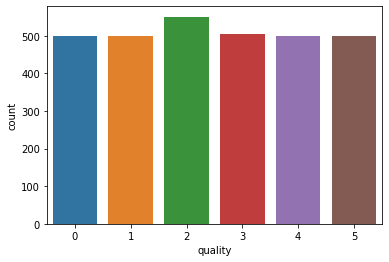

In [226]:
sns.countplot(y_train_res)

# Classification using OVA decomposition technique

In [227]:

pred_rfc = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train_res, y_train_res).predict(X_test)


D:\miniconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\miniconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\miniconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\miniconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\miniconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\miniconda3\lib\site-package

In [250]:
from sklearn.metrics import multilabel_confusion_matrix
print(multilabel_confusion_matrix(y_test,pred_rfc,labels=['0','1','2','3','4','5']))

[[[298  21]
  [  1   0]]

 [[267  43]
  [  8   2]]

 [[138  52]
  [ 54  76]]

 [[180   8]
  [123   9]]

 [[247  31]
  [ 25  17]]

 [[257  58]
  [  2   3]]]
